# Matplotlib.pyplot package
https://matplotlib.org/stable/tutorials/introductory/pyplot.html#intro-to-pyplot
*** 

## Overview of Matplotlib.pyplot python package

**Matplotlib** is a plotting package that creates plots and charts in just a few lines of code. It can transform different data structure, for example list, numpy arrays and pandas dataframes into plots. <br>
<br>
**Matplotlib.pyplot module** is a collection of functions, each function makes some change to a figure or a plot element[1]. For example, creates a figure, plots some lines in a plotting area, changes ticks of axis, decorates the plot with labels and text, etc.. User can add new elements to the plot, like adding legends, title, style sheet bit by bit as it uses an object oriented approach to plotting. Various states are preserved across function calls, which means it memorises and keeps track of different elements and current figure, until plt.show() is called. User can create a plot using categorical variables, list or array, numpy array and pandas.DataFrame. <br>

Steps to create a plot: <br>
1. Create a figure that keeps the whole image output
2. Chop and change the data being used for the plot
3. Calling the function of the desired plot, and supply the data
4. Setting axes, title, legend and text
5. Styling color, lines
5. plt.show() to display


**REFERENCE**<br>
[1] https://matplotlib.org/stable/tutorials/introductory/pyplot.html<br>
https://towardsdatascience.com/customizing-multiple-subplots-in-matplotlib-a3e1c2e099bc<br>
https://pythonguides.com/matplotlib-subplot-tutorial/<br>
https://matplotlib.org/stable/gallery/index.html (sample plots functions) </br>
https://realpython.com/python-matplotlib-guide/ (detailed guide) </br>

### Start with a simple plot

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch # for pie chart

Let's start off by creating a simple plot, then build it up and try out different functions.

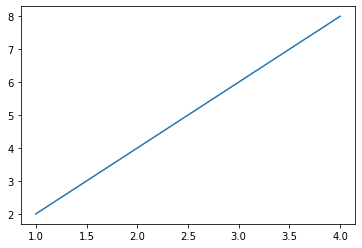

In [2]:
# generating a plot using pyplot is simple and quick
# some data
x = [1,2,3,4] 
y = [2,4,6,8]

plt.plot(x,y) #plot x against y

plt.show() # call to display the plot

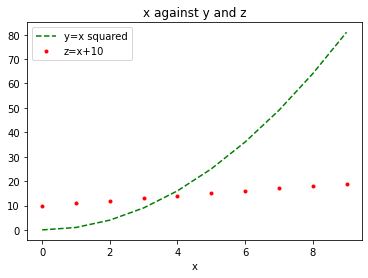

In [3]:
# pyplot can work with numpy array as well
# create some data

x = np.arange(0,10,1)
y = x**2
z = x+10

fig, ax = plt.subplots()
#setting label for creating legend later
ax.plot(x, y, '--g', label='y=x squared') 
ax.plot(x, z, '.r', label='z=x+10')

plt.xlabel("x") #adding label to x axis
plt.title("x against y and z") #add a title to the plot too
plt.legend(loc='upper left') #set legend position

plt.show()

### Plotting with numpy array and pandas data frame

*Plotting with numpy generated random numbers* 

*plotting with pandas data frame*

Let's plot with some real data
Apart from the line plot above, user can also create a scatterplot with the package, and many others including histogram, bar chart, pie chart etc.

**Scatterplot**

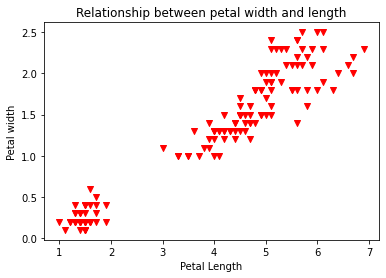

In [4]:
# Iris data scatterplot
# import the dataframe
df = pd.read_csv("iris.csv")
# change marker, and color
plt.scatter(df['petal_length'], df['petal_width'], marker="v", color="r",)
plt.title('Relationship between petal width and length')
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.show()

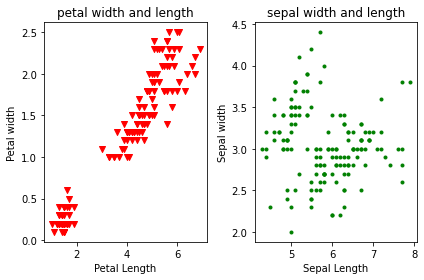

In [8]:
#multiple subplots and axis

df = pd.read_csv("iris.csv")

plt.figure()

# creating 2 side-by-side subplots
plt.subplot(121)
plt.scatter(df['petal_length'], df['petal_width'], marker="v", color="r",)
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.title('petal width and length')

plt.subplot(122)
plt.scatter(df['sepal_length'], df['sepal_width'], marker=".", color="g",)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.title('sepal width and length')
plt.tight_layout() #auto adjust subplot
plt.show()

***
## Introduce 3 interesting plots
- Horizontal barchart
- Pie chart
- heatmap

There are a wide range of plot types in the package that user can choose from, depending on the data types and purpose. The followings are demostration of 3 interesting plots

### Horizontal barchart 
Bar chart is used for visualizing counts or summary statistics. For example sales of different make of cars over a 12-month period, voting rate of different counties, count of species in the Iris dataset etc.<br>

Let's say there is an owner of an ice-cream shop who wants to know customers' preference of different ice-cream flavors. He did a survey and got back some results. The following is a visualization of the results of the statement "Chocolate is your favorite ice-cream flavor", on a 3-point scale.

#### Simple horizontal barchart

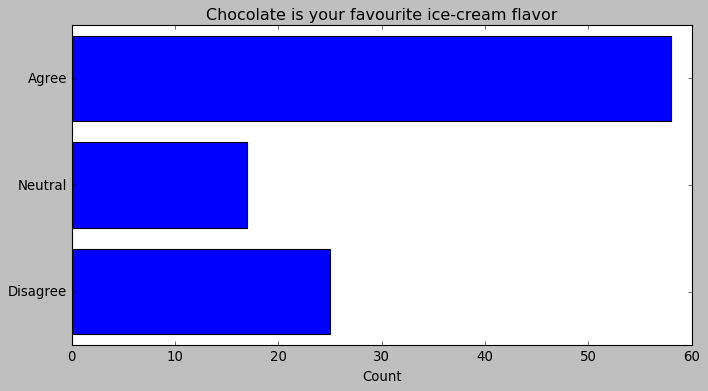

In [5]:
#simple horizontal barchart

fig,ax = plt.subplots(figsize=(10,5))

# data
category = ('Disagree', 'Neutral', 'Agree')
chocolate = [25, 17, 58]

#ax.barh(y_pos, data)
y_pos = np.arange(len(category))
ax.barh(y_pos, chocolate, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(category)
ax.set_xlabel('Count')
ax.set_title('Chocolate is your favourite ice-cream flavor')
plt.style.use('classic')

plt.show()

<br>

Now, the owner is planning to introduce new flavor and wants to know which of the three flavors customers would be interested in. The owner actually has several ice-cream shops located at differnt districts and he wants to see if there is any differences among the shops. <br> 

While a simple bar chart only shows a summary, a grouped bar chart allows us to do a little bit of comparison. It will be used to visualize the survey results and the differences among shops here.<br>

#### Grouped horizontal bar chart

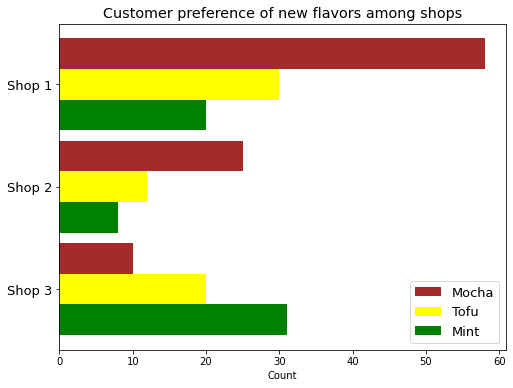

In [3]:
# data in a data frame
df = pd.DataFrame.from_dict({
    'shop':['Shop 1', 'Shop 2', 'Shop 3'],
    'mocha':[58,25,10], 
    'tofu':[30,12,20], 
    'mint':[20,8,31]}) 

height = 0.3
y_pos = np.arange(len(df['shop']))

#y position is adjusted so 3 bars line up nicely
plt.rcParams["figure.figsize"] = (8,6)
plt.barh(y=y_pos-height, width=df['mocha'], height=height, color='brown', label='Mocha')
plt.barh(y=y_pos, width=df['tofu'], color='yellow', label='Tofu', height=height)
plt.barh(y=y_pos+height, width=df['mint'], color='green', label='Mint',height=height)

plt.yticks(y_pos, df["shop"],fontsize=13)
plt.legend(fontsize=13)
plt.style.use('ggplot')
plt.xlabel("Count")
plt.title("Customer preference of new flavors among shops")
plt.gca().invert_yaxis()

plt.show()

<br>

#### Horizontal stacked barchart
While the group bar chart looks a bit too crowded, we can change it into a stacked barchart, which visualises customers' preference as well as telling the differences in reponse collected from difference shops.

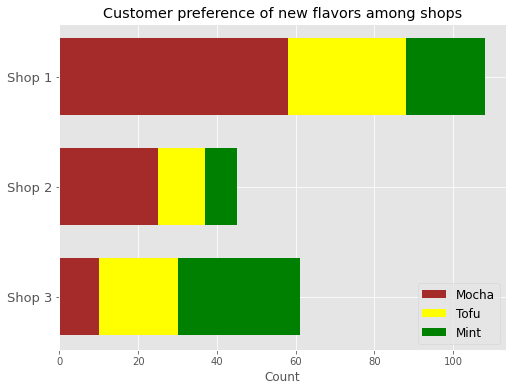

In [4]:
# using data from above plot

height = 0.7
y_pos = np.arange(len(df['shop']))

# left parameter indicates where the next color bar starts
mocha = plt.barh(y=y_pos, width=df['mocha'], height=height, color='brown', label='Mocha')
tofu= plt.barh(y=y_pos, width=df['tofu'], color='yellow', label='Tofu', height=height, left=df['mocha'])
mint = plt.barh(y=y_pos, width=df['mint'], color='green', label='Mint',height=height,left=df['mocha']+df['tofu'])

plt.yticks(y_pos,labels=df['shop'],fontsize=13)
plt.legend(fontsize=12, loc="best")
plt.style.use('ggplot')
plt.xlabel("Count")
plt.title("Customer preference of new flavors among shops")

'''for rowNum, row in df.iterrows():
  xpos=0
  for val in row:
    xpos= xpos+ int(val)
    plt.text(xpos+1, rowNum-0.05, str(val), color='black')'''
#plt.bar_label(mocha, labels=[58,25,10])
#plt.bar_label(tofu, padding=3)
#plt.bar_label(mint, padding=3)
plt.gca().invert_yaxis()
plt.show()

Now it is easier to spot customers' preference by the size of the color blocks, and the number of results collected from different shops. 

<br>
<br>

### Pie Chart
https://matplotlib.org/3.5.0/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py <br>

Pie chart illustrates relative size of data. The wedges are plotted counterclockwise, by default starting from the x-axis.It takes in an array, and allows further break down of a slice of pie, with the parameter **explode**. It also allows customising legend, labels and start angle. 

<br>

#### Simple Pie Chart
To plot a simple pie chart, simply call the function *.pie()*.
For example, the owner of the ice-cream shop wants to know the sales of different ice-cream flavors on a particular day.

In [9]:
# data to plot
flavors = ['Chocolate','Vanila','Mint','Caramel',]
#sales = np.random.default_rng().integers(0,100,200) #want some random data
sales = [90,40,10,60]
#sales

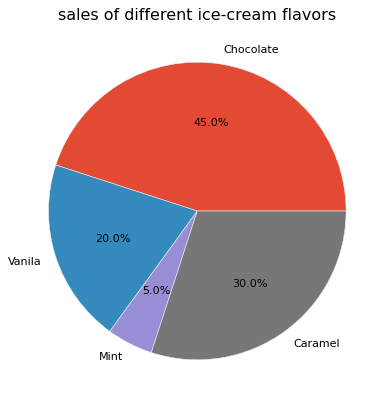

In [14]:
fig,ax = plt.subplots(figsize= (6,6))
ax.pie(sales, labels=flavors, autopct="%1.1f%%") #show % of each slice
plt.title("sales of different ice-cream flavors")
plt.style.use("classic") #color map?
plt.show()

#### Exploded pie chart
It helps to direct attention to the exploded slice of the chart. Explode parameter specifies which slice of the pie to explode. In this case, the first slice, i.e. Chocolate. 

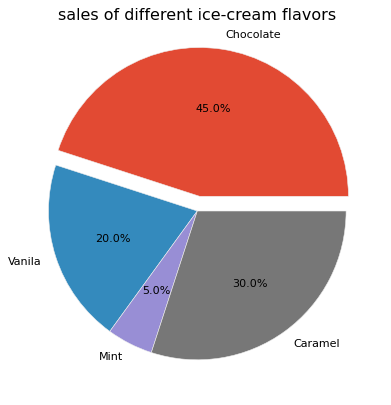

In [23]:
# with exploded 'Chocolate' slice
explode = [.1, 0, 0, 0]
fig,ax = plt.subplots(figsize= (6,6))
ax.pie(sales, labels=flavors, autopct="%1.1f%%", explode=explode) #show % of each slice
plt.title("sales of different ice-cream flavors")
plt.style.use("ggplot") #color map?
plt.show()

Explode parameter allows more than 1 slice to be exploded, but that might look a bit awkward.
<br>

#### Pie Chart and a bar of pie
A bar of pie shows a further break down of the first slice of pie to show more details. It goes side by side with the pie chart. 
In this case, the bar of pie shows a further break down of sales of chocolate flavor in the particular day.
<br>
<br>
*note: the code of connecting lines between the pie chart and bar of pie is adopted from "https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py"*

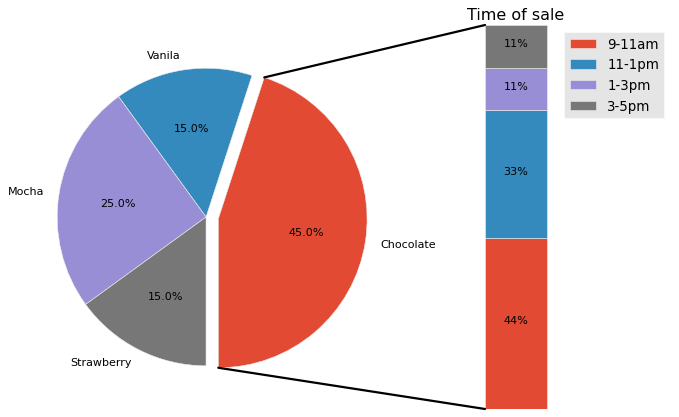

In [24]:
# make figure and assign axis objects; ax1 for the pie chart, 
# ax2 for the exploded bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# data
flavours = ["Chocolate", "Vanila", "Mocha", "Strawberry"]
sales = [90,30,50,30] 
#sales of chocolate flavours at different time of the day
time_choco = [40,30,10,10] 

# pie chart parameters from above cell
explode = (0.1, 0, 0, 0)
ax1.pie(sales, labels=flavours, explode=explode, radius=1.2, startangle=270,autopct='%1.1f%%')
# up to this point a basic pie chart is plotted on the left, with labels 

# bar chart parameters
xpos = 0 #set value of x axis
bottom = 0
width = .5
saleofFlavour = sales[0]

for i in range(len(time_choco)):
  height = time_choco[i]/saleofFlavour
  ax2.bar(xpos, height, width, bottom=bottom)
  # make it a stacked bar chart, stack the new block on top of the existing ones
  ypos=bottom + ax2.patches[i].get_height()/2 
  bottom+=height
  # add % in the center of each the block
  ax2.text(xpos,ypos,'%d%%' % (ax2.patches[i].get_height()*100),ha='center')

ax2.set_title('Time of sale')
ax2.legend(("9-11am","11-1pm","1-3pm","3-5pm"))
ax2.axis('off') #not showing axis of bar chart
ax2.set_xlim(-2.5*width, 2.5*width) #adjusting width of bar 

# adding connecting lines
# this part adopted from "https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py"

# draw top connecting line
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2) #setting density of line
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

### Heat Map
https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

Heat map is used to show two independent variables with color codes. It can be used for showing coorelation, as well as relationship of two (sets of) categorical data. It takes in a 2D array, and 2 cateogories or 2 lists of categories.

#### Simple Heat Map

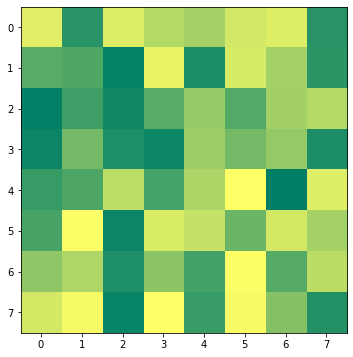

In [3]:
# generate some random data
data = np.random.random((8, 8))

#set figure size
plt.rcParams["figure.figsize"] = (8,6)
#generate heatmap, set colormap
plt.imshow(data, cmap='summer', interpolation='nearest')
'''list of interpolation options: 
 [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']'''
plt.show()

#### Annotated heatmap

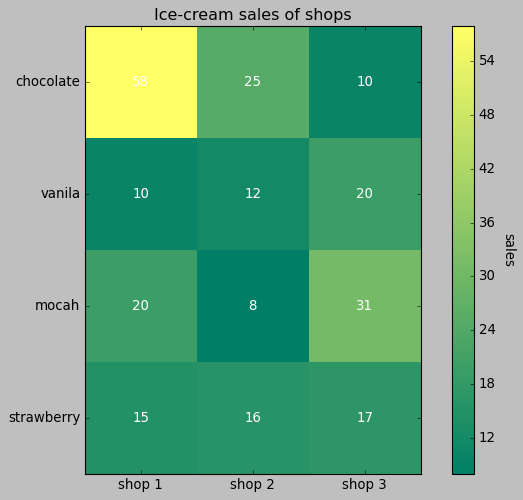

In [7]:
# ice-cream data
# aim to visualise relationship of month and ice-cream sales or shop and ice-cream sales

'''df = pd.DataFrame.from_dict({
    'store':['Store 1', 'Store 2', 'Store 3'],
    'chocolate':[58,25,10], 
    'vanila':[30,12,20], 
    'mocha':[20,8,31]}) 
    'strawberyy':[?]'''

shop = ['shop 1','shop 2','shop 3']
flavors = ['chocolate','vanila','mocah','strawberry']
sales = np.array([[58,25,10],[10,12,20],[20,8,31],[15,16,17]])

fig, ax= plt.subplots(figsize=(10,7))
im = ax.imshow(sales, cmap='summer', interpolation='nearest')

#show ticks
ax.set_xticks(np.arange(len(shop)))
ax.set_yticks(np.arange(len(flavors)))
# label the ticks
ax.set_xticklabels(shop)
ax.set_yticklabels(flavors)

#set color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(ylabel="sales", rotation=-90, va="bottom")

# Loop over data dimensions and create text annotations.
for i in range(len(flavors)):
    for j in range(len(shop)):
        text = ax.text(j, i, sales[i, j],
                       ha="center", va="center", color="w")

plt.title("Ice-cream sales of shops")
plt.show()

**Complex Heat Map**

References:
[1]
[2]